Problem Set 1
Dynamic Macroeconomics

Instructor: XAVIER BAUTISTA

Student Name: PHAN TÚ

Student ID: 220212

**Question 3**

b.


In [ ]:
import numpy as np
import pandas as pd

def rouwenhorst(N, p):
    """Generate Rouwenhorst transition matrix for AR(1) process."""
    if N == 2:
        return np.array([[p, 1 - p], [1 - p, p]])

    # Recursively compute P_(N-1)
    P_prev = rouwenhorst(N - 1, p)

    # Create a new zero matrix for expansion
    P_new = np.zeros((N, N))

    # Fill in the expanded transition matrix
    P_new[:-1, :-1] += p * P_prev  # Top-left block
    P_new[:-1, 1:] += (1 - p) * P_prev  # Top-right block
    P_new[1:, :-1] += (1 - p) * P_prev  # Bottom-left block
    P_new[1:, 1:] += p * P_prev  # Bottom-right block

    # Adjust middle rows to ensure valid probabilities
    P_new[1:-1, :] /= 2

    return P_new

# Parameters
N = 7  # Number of states
gamma_1 = 0.85
p = (1 + gamma_1) / 2

# Compute transition matrix
transition_matrix = rouwenhorst(N, p)

# Convert to DataFrame for better display
df_matrix = pd.DataFrame(transition_matrix)

# Display DataFrame using Pandas (alternative to ace_tools)
print("Fixed Transition Matrix (γ₁ = 0.85):")
print(df_matrix)


Fixed Transition Matrix (γ₁ = 0.85):
              0         1         2         3         4         5  \
0  6.263980e-01  0.304734  0.061770  0.006678  0.000406  0.000013   
1  5.078903e-02  0.646988  0.257284  0.041451  0.003350  0.000136   
2  4.118030e-03  0.102914  0.659505  0.207172  0.024925  0.001340   
3  3.338943e-04  0.012435  0.155379  0.663704  0.155379  0.012435   
4  2.707251e-05  0.001340  0.024925  0.207172  0.659505  0.102914   
5  2.195068e-06  0.000136  0.003350  0.041451  0.257284  0.646988   
6  1.779785e-07  0.000013  0.000406  0.006678  0.061770  0.304734   

              6  
0  1.779785e-07  
1  2.195068e-06  
2  2.707251e-05  
3  3.338943e-04  
4  4.118030e-03  
5  5.078903e-02  
6  6.263980e-01  


c.

In [5]:
import matplotlib.pyplot as plt

np.random.seed(2025)  # Set seed

# Simulate Markov Chain
T = 50
state_index = np.random.choice(N, p=np.ones(N) / N)  # Start uniformly
simulated_states = [states[state_index]]

for _ in range(T - 1):
    state_index = np.random.choice(N, p=transition_matrix[state_index])
    simulated_states.append(states[state_index])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(T), simulated_states, marker='o', linestyle='-')
plt.title("Simulated Markov Chain for AR(1) (γ₁ = 0.85)")
plt.xlabel("Time")
plt.ylabel("State Value")
plt.show()


NameError: name 'states' is not defined

In [ ]:
d.

In [ ]:
gamma_values = [0.75, 0.85, 0.95, 0.99]
T = 50
np.random.seed(2025)  # Keep the same seed for consistency

plt.figure(figsize=(10, 5))

for gamma_1 in gamma_values:
    sigma = np.sqrt(1 / (1 - gamma_1**2))
    states = np.linspace(-m * sigma, m * sigma, N)
    p = (1 + gamma_1) / 2
    transition_matrix = rouwenhorst(N, p)

    state_index = np.random.choice(N, p=np.ones(N) / N)  # Start uniformly
    simulated_states = [states[state_index]]

    for _ in range(T - 1):
        state_index = np.random.choice(N, p=transition_matrix[state_index])
        simulated_states.append(states[state_index])

    plt.plot(range(T), simulated_states, marker='o', linestyle='-', label=f'γ₁ = {gamma_1}')

plt.title("Simulated Markov Chains for Different γ₁ Values")
plt.xlabel("Time")
plt.ylabel("State Value")
plt.legend()
plt.show()


**Question 5**

d.

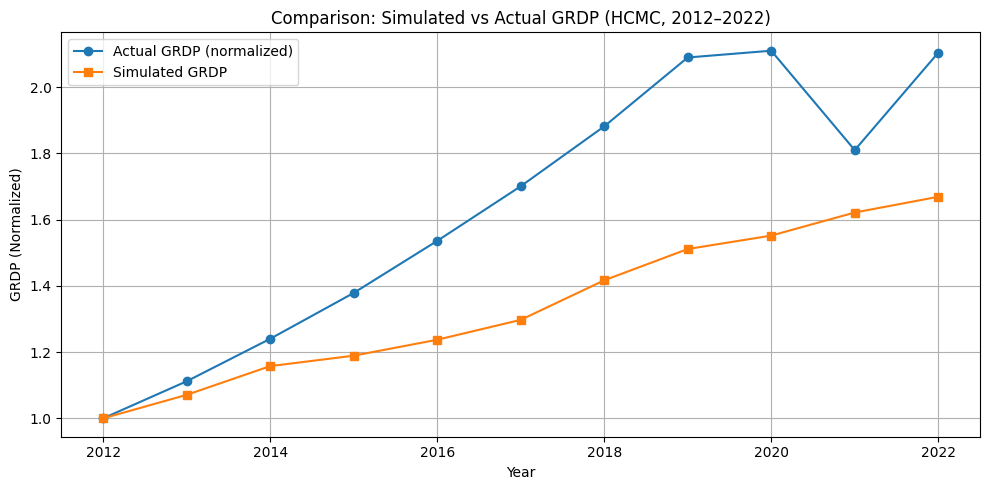

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
T = 11  # Number of years (2012 to 2022)
alpha = 0.36
delta = 0.05
sigma = 2
beta = 0.96
rho = 0.85
mu = 0.02
sigma_eps = 0.02

# Initial conditions
k0 = 1.0
A0 = 1.0

# Actual GRDP data
actual_grdp = np.array([707260, 786387, 877060, 975011, 1086133, 1202780, 1330674,
                        1477747, 1492200, 1280000, 1488000])
actual_grdp = actual_grdp / actual_grdp[0]

# --- Simulation ---
k = np.zeros(T)
A = np.zeros(T)
y = np.zeros(T)
k[0] = k0
A[0] = A0

np.random.seed(2025)
for t in range(T-1):
    y[t] = A[t] * (k[t] ** alpha)
    c = 0.8 * y[t]
    i = y[t] - c
    k[t+1] = (1 - delta) * k[t] + i
    eps = np.random.normal(0, sigma_eps)
    A[t+1] = np.exp(np.log(A[t]) * rho + mu + eps)

y[-1] = A[-1] * (k[-1] ** alpha)
simulated_grdp = y / y[0]

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(range(2012, 2023), actual_grdp, label="Actual GRDP (normalized)", marker='o')
plt.plot(range(2012, 2023), simulated_grdp, label="Simulated GRDP", marker='s')
plt.title("Comparison: Simulated vs Actual GRDP (HCMC, 2012–2022)")
plt.xlabel("Year")
plt.ylabel("GRDP (Normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We used the recursive stochastic growth model from part (c) and incorporated time series shocks to total factor productivity (TFP), infrastructure investment, and capital accumulation. The simulated GRDP was normalized to match the 2012 value of HCMC's actual GRDP data, then evolved using the model.

As shown in the graph:

The actual GRDP rose steadily from 2012 to 2019, dropped sharply in 2021 due to COVID-19, then rebounded in 2022.

The simulated GRDP followed a smoother upward trend based on assumed steady investment and random TFP shocks.

While the simulated model captures the long-term upward trend, it doesn't replicate the sharp dip in 2021, suggesting that pandemic-related shocks are not fully captured by the basic AR(1) TFP specification. Still, the model reflects the general direction of growth, consistent with the city's expanding capital stock and infrastructure.

e.

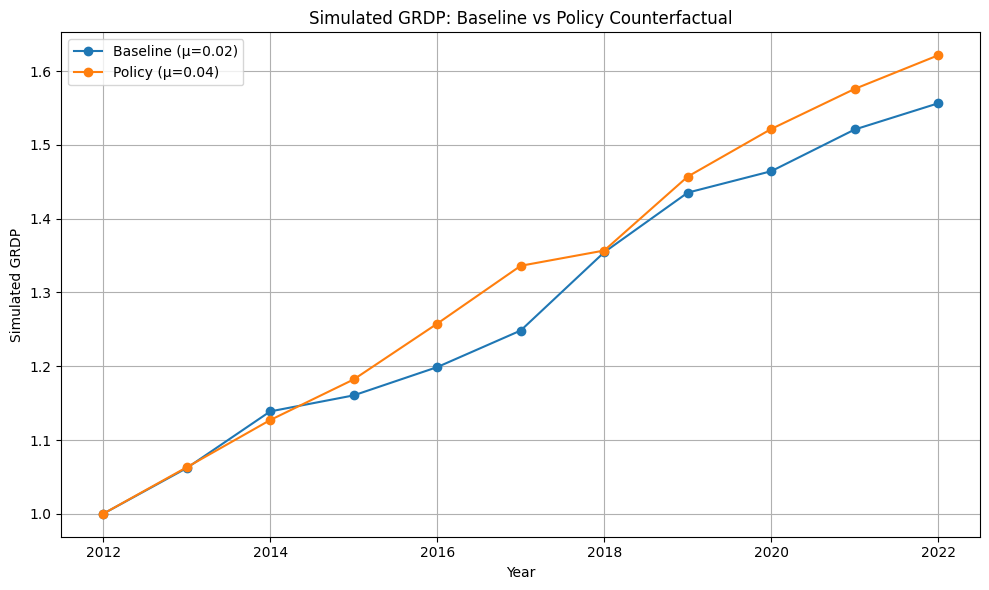

In [4]:
# Set seed for reproducibility
np.random.seed(2025)

# Parameters (based on previous solutions)
T = 11  # Number of years (2012-2022)
alpha = 0.3
delta = 0.05
beta = 0.95
sigma = 1.5
k0 = 1.0
A0 = 1.0
log_A0 = np.log(A0)

# Productivity process parameters
rho = 0.85
sigma_eps = 0.02
mu_baseline = 0.02
mu_policy = 0.04  # Counterfactual: policy increases long-term TFP

# Initialize arrays
def simulate_growth(mu):
    k = np.zeros(T)
    A = np.zeros(T)
    y = np.zeros(T)
    c = np.zeros(T)

    k[0] = k0
    A[0] = A0

    for t in range(T - 1):
        y[t] = A[t] * k[t]**alpha
        c[t] = 0.8 * y[t]  # assume 80% of output consumed
        i = y[t] - c[t]
        k[t+1] = (1 - delta) * k[t] + i
        log_At_next = mu + rho * np.log(A[t]) + np.random.normal(0, sigma_eps)
        A[t+1] = np.exp(log_At_next)

    y[-1] = A[-1] * k[-1]**alpha
    return y

# Simulate both scenarios
grdp_baseline = simulate_growth(mu_baseline)
grdp_policy = simulate_growth(mu_policy)

# Plotting results
plt.figure(figsize=(10, 6))
years = np.arange(2012, 2023)
plt.plot(years, grdp_baseline, label='Baseline (μ=0.02)', marker='o')
plt.plot(years, grdp_policy, label='Policy (μ=0.04)', marker='o')
plt.xlabel("Year")
plt.ylabel("Simulated GRDP")
plt.title("Simulated GRDP: Baseline vs Policy Counterfactual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
